<a href="https://colab.research.google.com/github/sampritich/myfirst_repository/blob/master/Timeseries_Analysis_ugbgil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ic=pd.read_csv('/content/ICICIBANK_v8qqcf.csv')
ic.head()

,Date,open,high,low,close,volume
0,2004-06-23,45.84,47.27,45.82,46.10,10997496
1,2004-06-24,45.82,47.96,43.87,46.21,12604239
2,2004-06-25,46.55,46.55,44.95,45.56,7008808
3,2004-06-28,45.91,46.36,44.64,45.98,7126519
4,2004-06-29,45.83,46.25,44.67,45.24,4857203


In [4]:
ic=pd.read_csv('/content/ICICIBANK_v8qqcf.csv', parse_dates=True, index_col='Date')
ic.head()

,open,high,low,close,volume
Date,,,,,
2004-06-23,45.84,47.27,45.82,46.10,10997496
2004-06-24,45.82,47.96,43.87,46.21,12604239
2004-06-25,46.55,46.55,44.95,45.56,7008808
2004-06-28,45.91,46.36,44.64,45.98,7126519
2004-06-29,45.83,46.25,44.67,45.24,4857203


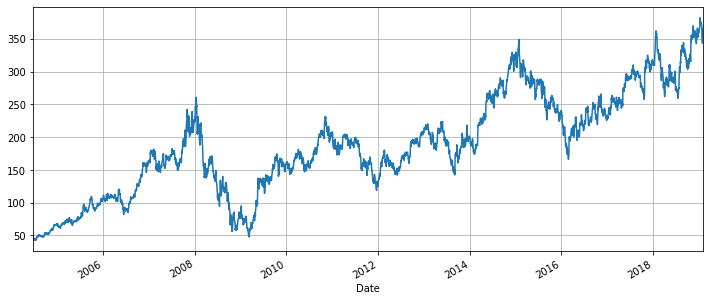

In [5]:
ic.close.plot(figsize=(12, 5), grid=True)
plt.show()

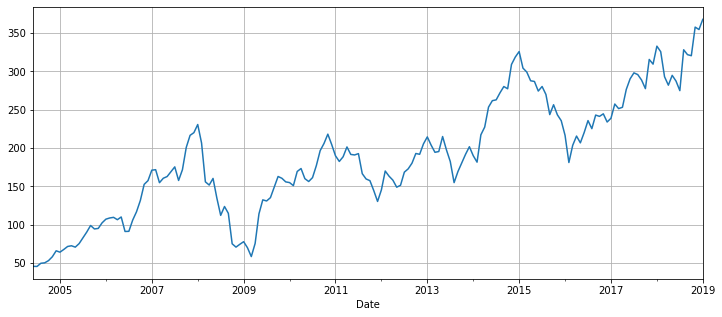

In [6]:
ic_resampled  = ic.close.resample('M').mean()
ic_resampled.plot(figsize=(12, 5), grid=True)
plt.show()

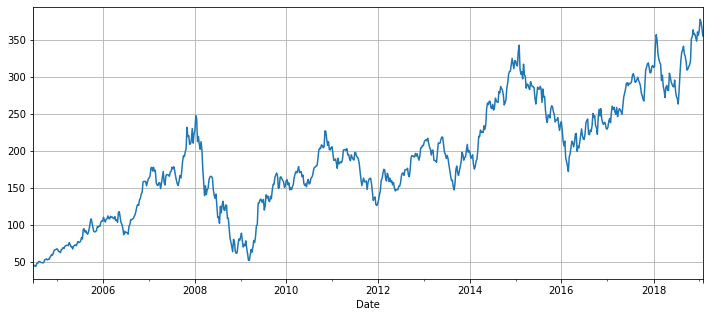

In [18]:
ic_resampled  = ic.close.resample('W').mean()
ic_resampled.plot(figsize=(12, 5), grid=True)
plt.show()

In [19]:
ic_resampled.head()

Date
2004-06-27    45.956667
2004-07-04    45.048000
2004-07-11    43.834000
2004-07-18    43.496000
2004-07-25    47.314000
Freq: W-SUN, Name: close, dtype: float64

In [13]:
ic.close.head(3)

Date
2004-06-23    46.10
2004-06-24    46.21
2004-06-25    45.56
Name: close, dtype: float64

In [14]:
ic_rooling=ic.close.rolling(3).mean()
ic_rooling.head(5)

Date
2004-06-23          NaN
2004-06-24          NaN
2004-06-25    45.956667
2004-06-28    45.916667
2004-06-29    45.593333
Name: close, dtype: float64

In [16]:

ic['roll_mean'] = ic.close.rolling(5).mean()
ic.loc[:, ['roll_mean', 'close']].head(10)


,roll_mean,close
Date,,
2004-06-23,NaN,46.10
2004-06-24,NaN,46.21
2004-06-25,NaN,45.56
2004-06-28,NaN,45.98
2004-06-29,45.818,45.24
2004-06-30,45.488,44.45
2004-07-01,45.256,45.05
2004-07-02,45.048,44.52
2004-07-05,44.410,42.79


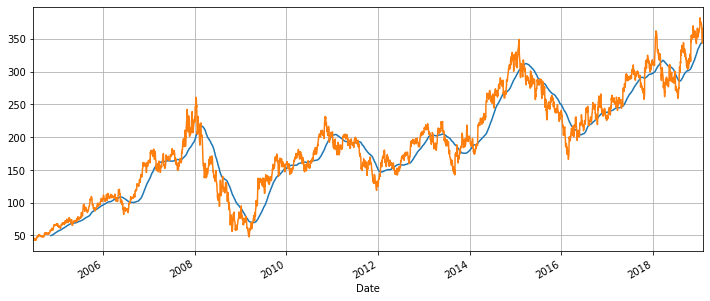

In [17]:
ic_rolling  = ic.close.rolling(100).mean()
ic_rolling.plot(figsize=(12, 5), grid=True)
ic.close.plot(figsize=(12, 5), grid=True)
plt.show()

## Test for Stationarity

In [0]:
from statsmodels.tsa.stattools import adfuller

In [21]:
adfuller(ic_resampled)

(-1.408955016001226,
 0.5779755213187958,
 1,
 761,
 {'1%': -3.4389722010249386,
  '10%': -2.5687964010457227,
  '5%': -2.8653454308425705},
 5198.022589802209)

In [23]:
adfuller(ic_resampled)[1]# p value only

0.5779755213187958

### Converting non stationary to stationary
* diff(), sometimes multiple times
* log
* sqrt
* df.shift(1)/df: Proportional
__Often simple solution(diff) is the best one__

In [0]:
ic_resampled.head()

Date
2004-06-27    45.956667
2004-07-04    45.048000
2004-07-11    43.834000
2004-07-18    43.496000
2004-07-25    47.314000
Freq: W-SUN, Name: close, dtype: float64

In [0]:
ic_resampled.diff().head()

Date
2004-06-27         NaN
2004-07-04   -0.908667
2004-07-11   -1.214000
2004-07-18   -0.338000
2004-07-25    3.818000
Freq: W-SUN, Name: close, dtype: float64

In [0]:
ic_resampled.diff().diff().dropna().head()

Date
2004-06-27         NaN
2004-07-04         NaN
2004-07-11   -0.305333
2004-07-18    0.876000
2004-07-25    4.156000
Freq: W-SUN, Name: close, dtype: float64

### Remember Dickey fuller tests only Trend stationarity. So visualisation is not replacable

In [0]:
adfuller(ic_resampled.diff().dropna())[1]

0.0

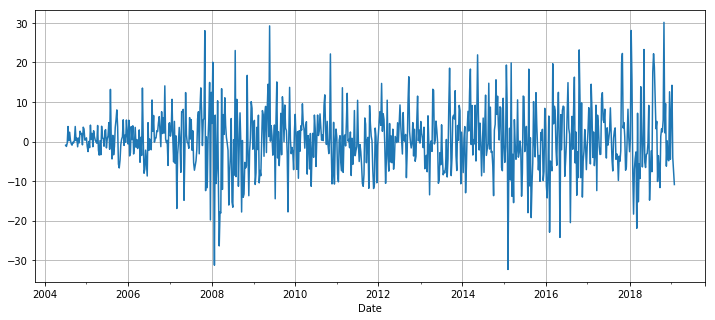

In [0]:
ic_resampled.diff().dropna().plot(figsize=(12, 5), grid=True)
plt.show()

In [0]:
adfuller(np.log(ic_resampled))[1]

0.12832778257580418

In [0]:
adfuller(np.sqrt(ic_resampled))[1]

0.3629293180626696

In [0]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean() 
    rolstd = timeseries.rolling(window=52).std()
    #Plot rolling statistics:
    plt.figure(figsize=(12,3))
    plt.grid(True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)[1]
    print('p_value: ', dftest)

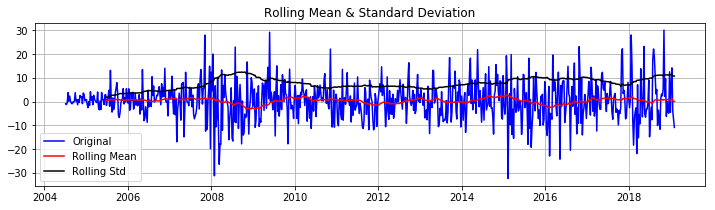

Results of Dickey-Fuller Test:
p_value:  0.0


In [0]:
test_stationarity(ic_resampled.diff().dropna())

In [0]:
pas=pd.read_csv('SeaPlaneTravel.csv', parse_dates=True, index_col='Month')
pas.columns=['Passengers']
pas.head()

,Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


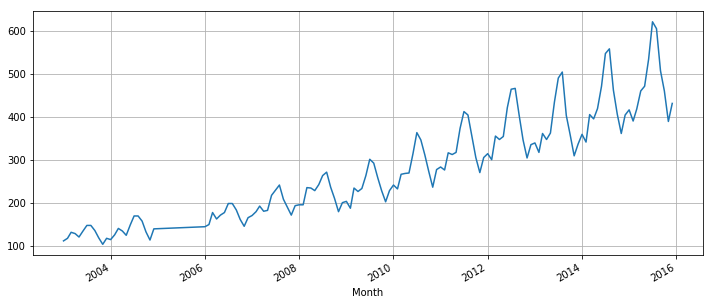

In [0]:
pas.Passengers.plot(figsize=(12, 5), grid=True)
plt.show()

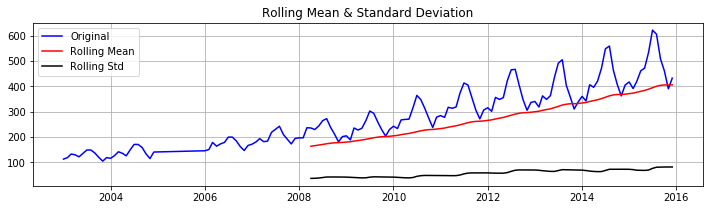

Results of Dickey-Fuller Test:
p_value:  0.9918802434376409


In [0]:
test_stationarity(pas.Passengers)

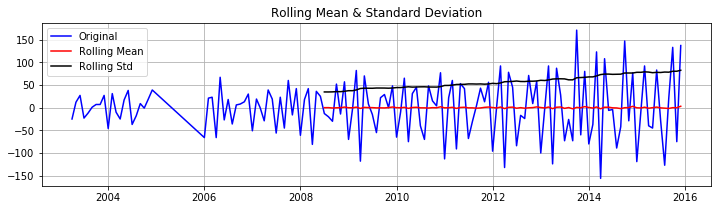

Results of Dickey-Fuller Test:
p_value:  5.0799668839196865e-16


In [0]:
test_stationarity(pas.Passengers.diff().diff().diff().dropna())

## ARMA models
* __Requires the data to be Stationary__

### Auto Regressive AR Model

__AR(1)__

### \begin{equation*}P(today) = Mean  +  Coeff*P(yesterday) + Noise \end{equation*}
### \begin{equation*}P(t) = \mu + \gamma1*P(t-1) + \epsilon \end{equation*}

* __If gamma = 0 model is Mean plus noise__

__AR(2)__

### \begin{equation*}P(t) = \mu + \gamma1*P(t-1) +  \gamma2*P(t-2) + \epsilon \end{equation*}

### Moving Average MA Model

MA(1) Model

### \begin{equation*}P(t) = \mu + \theta1*\epsilon(t-1) + \epsilon(t) \end{equation*}

MA(2) Model

### \begin{equation*}P(t) = \mu + \theta2*\epsilon(t-2) + \theta1*\epsilon(t-1) + \epsilon(t) \end{equation*}


### ARMA Model

ARMA(1,1)

### \begin{equation*}P(t) = \mu +  \gamma1*P(t-1) + \theta1*\epsilon(t-1) + \epsilon(t) \end{equation*}

In [0]:
ic_resampled.diff().dropna().autocorr(3)

-0.014092986934383546

# ACF- PACF to determine lags the model (AR, MA, ARMA) and lags(p and q)

In [0]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

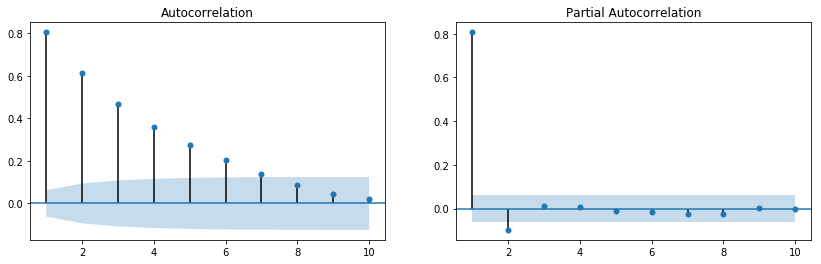

In [0]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

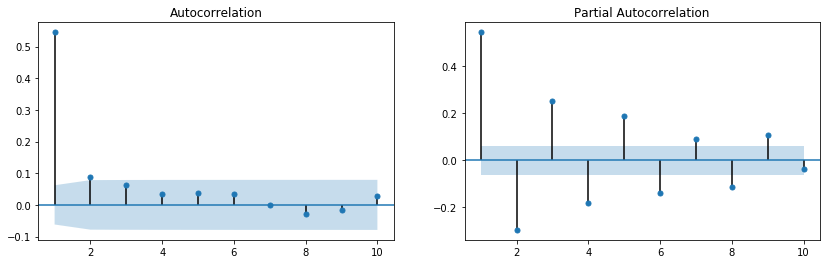

In [0]:
ar_coeffs = [1, 0] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

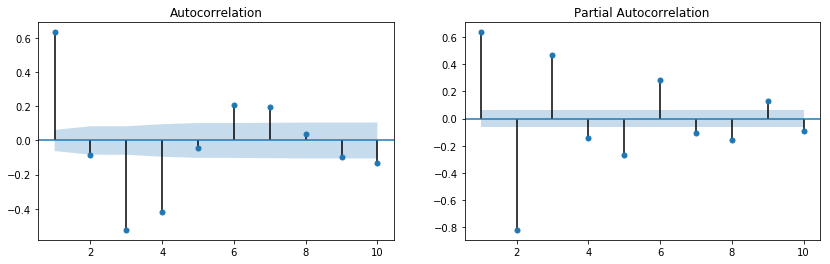

In [0]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9, 0.7]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(y, lags=10, zero=False, ax=ax[0])
plot_pacf(y, lags=10, zero=False, ax=ax[1])
plt.show()

## If the model is ARMA we have to try different models to find the right one

In [0]:
from statsmodels.tsa.arima_model import ARMA

In [0]:
ar_coeffs = [1, -0.8, 0.7] # 1 is for the 0 lag term, this is always set to 1. The sign of coefficients is reverse
ma_coeffs = [1, 0.9, 0.7]  # 1 is for the 0 lag term, this is always set to 1
y = arma_generate_sample(ar_coeffs, ma_coeffs, nsample=1000)

In [0]:
model = ARMA(y, order=(2, 2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1417.154
Method:                       css-mle   S.D. of innovations              0.996
Date:                Sun, 04 Aug 2019   AIC                           2846.308
Time:                        22:02:21   BIC                           2875.754
Sample:                             0   HQIC                          2857.499
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1667      0.097     -1.725      0.085      -0.356       0.023
ar.L1.y        0.8415      0.027     31.076      0.000       0.788       0.895
ar.L2.y       -0.6712      0.026    -25.841      0.000      -0.722      -0.620
ma.L1.y        0.8845      0.027     32.695      0.000       0.832       0.938
ma.L2.y        0.6614      0.027     24.460      0.000       0.608       0.714
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6269           -1.0473j            1.2206           -0.1642
AR.2            0.6269           +1.0473j            1.2206            0.1642
MA.1           -0.6686           -1.0319j            1.2296           -0.3415
MA.2           -0.6686           +1.0319j            1.2296            0.3415
-----------------------------------------------------------------------------
"""

In [0]:
results.bic

2875.75424050236

In [0]:
# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(y, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None))            

In [0]:
df_pq = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
df_pq.sort_values(by='aic').head()

,p,q,aic,bic
12,2,2,2846.307709,2875.754241
17,3,2,2848.212790,2882.567077
13,2,3,2848.222398,2882.576685
18,3,3,2848.385579,2887.647621
22,4,2,2849.476915,2888.738957


# Arima Model

In [0]:
ic_resampled.tail()

Date
2019-01-06    363.3900
2019-01-13    377.6300
2019-01-20    373.6000
2019-01-27    366.0300
2019-02-03    355.1875
Freq: W-SUN, Name: close, dtype: float64

In [0]:
ic_resampled.diff().dropna().tail()

Date
2019-01-06     7.1400
2019-01-13    14.2400
2019-01-20    -4.0300
2019-01-27    -7.5700
2019-02-03   -10.8425
Freq: W-SUN, Name: close, dtype: float64

In [0]:
model = ARMA(ic_resampled.diff().dropna(), order=(1, 1))
results = model.fit()

In [0]:
len(ic_resampled.diff().dropna())

762

In [0]:
results.predict(760, 768)

2019-01-27   -0.249939
2019-02-03   -0.320760
2019-02-10   -0.648015
2019-02-17    0.453713
2019-02-24    0.402041
2019-03-03    0.404464
2019-03-10    0.404351
2019-03-17    0.404356
2019-03-24    0.404356
Freq: W-SUN, dtype: float64

In [0]:
results.forecast()

(array([-0.64801529]),
 array([7.9100267]),
 array([[-16.15138274,  14.85535215]]))

### The predictions are for differenced values. We would need to use cumsum to get to absolute predictions.  ARIMA takes care of these things

# Lets create an ARIMA Model to predict EURO per USD  rates  on Dataset from Quandl

### Steps to follow:
* Is the dataset stationary? (adfuller)
* if not, what order of differencing will make it stationary (transform the data)
* What values of p and q lags would be best (Try ACF/PACF plots or AIC/BIC approach)
* Fit the model
* Check the results    

In [0]:
df_fx_data = pd.read_csv('BOE-XUDLERD.csv')
df_fx_data.head()

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608


## CONVERTING TO TIME SERIES DATA

In [0]:
ts = pd.read_csv('BOE-XUDLERD.csv', parse_dates=True, index_col='Date')
ts=ts[::-1]
ts.head(5)

,Value
Date,
1975-01-02,0.7633
1975-01-03,0.7585
1975-01-06,0.7524
1975-01-07,0.7510
1975-01-08,0.7554


## VISUALIZE DATA

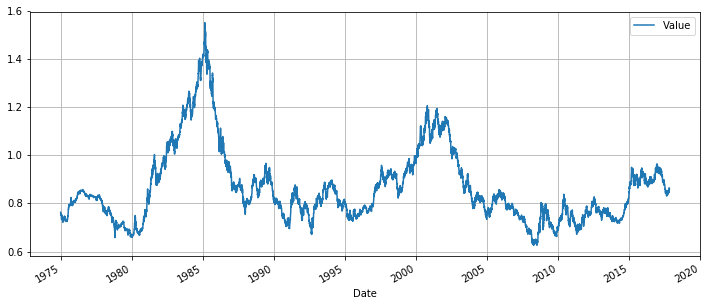

In [0]:
ts.plot(figsize=(12, 5), grid=True)
plt.show()

## RESAMPLE DATA

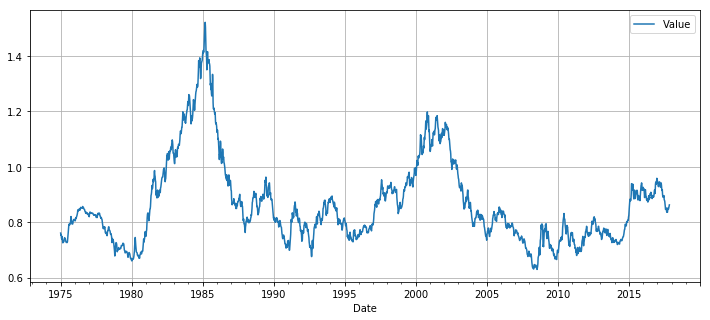

In [0]:
ts_week = ts.resample('W').mean()
ts_week.plot(figsize=(12, 5), grid=True)
plt.show()

# Stationarity Check Using Dickey Fuller Test 

In [0]:
adfuller(ts_week.Value)[1]

0.2541339550926388

# Convert Data Into Stationary Data

In [0]:
adfuller(ts_week.Value.diff().dropna())[1]

0.0

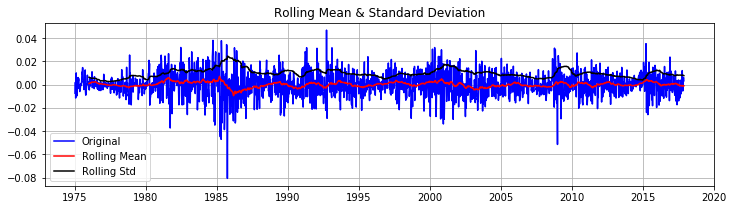

Results of Dickey-Fuller Test:
p_value:  0.0


In [0]:
ts_diff = ts_week.Value.diff().dropna()
test_stationarity(ts_diff)

# Identify the p and q lags

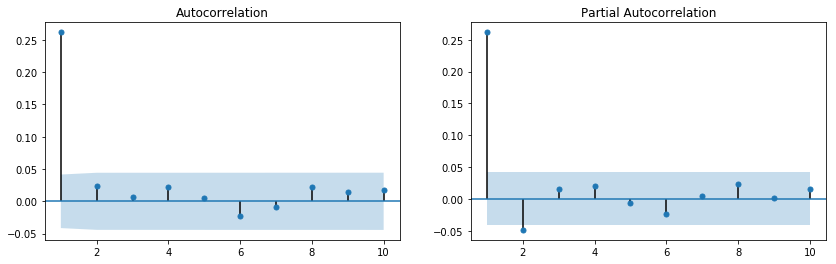

In [0]:
#ACF and PACF
fig, ax = plt.subplots(1,2, figsize = (14,4))
plot_acf(ts_diff, lags=10, zero=False, ax=ax[0])
plot_pacf(ts_diff, lags=10, zero=False, ax=ax[1])
plt.show()

In [0]:
#Lets 
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(ts_diff, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

C:\Users\Apoorv\Anaconda3\envs\trade\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\Apoorv\Anaconda3\envs\trade\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\Apoorv\Anaconda3\envs\trade\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Apoorv\Anaconda3\envs\trade\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


In [0]:
df_pq = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
df_pq.sort_values(by='aic').head()

,p,q,aic,bic
18,3,3,-14208.769283,-14163.069732
17,3,2,-14208.716278,-14168.729172
22,4,2,-14208.700504,-14163.000953
23,4,3,-14206.775048,-14155.363053
1,0,1,-14200.383815,-14183.246484


# ARIMA Model Implementation

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
model = ARIMA(ts_week.Value, order=(3, 1, 3))  
results_ARIMA = model.fit()

In [0]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                 2236
Model:                 ARIMA(3, 1, 3)   Log Likelihood                7112.385
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sun, 04 Aug 2019   AIC                         -14208.769
Time:                        22:55:23   BIC                         -14163.070
Sample:                    01-12-1975   HQIC                        -14192.084
                         - 11-12-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.437e-05      0.000      0.159      0.874      -0.001       0.001
ar.L1.D.Value    -0.1441      0.084     -1.711      0.087      -0.309       0.021
ar.L2.D.Value    -0.9482      0.026    -35.916      0.000      -1.000      -0.896
ar.L3.D.Value     0.1456      0.082      1.779      0.075      -0.015       0.306
ma.L1.D.Value     0.4203      0.085      4.971      0.000       0.255       0.586
ma.L2.D.Value     1.0195      0.031     32.936      0.000       0.959       1.080
ma.L3.D.Value     0.1197      0.082      1.453      0.146      -0.042       0.281
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1468           -0.9938j            1.0045           -0.2733
AR.2           -0.1468           +0.9938j            1.0045            0.2733
AR.3            6.8078           -0.0000j            6.8078           -0.0000
MA.1           -0.1518           -0.9970j            1.0085           -0.2740
MA.2           -0.1518           +0.9970j            1.0085            0.2740
MA.3           -8.2109           -0.0000j            8.2109           -0.5000
-----------------------------------------------------------------------------
"""

In [0]:
# Analyse residual errors. They should be normal
residuals = pd.DataFrame(results_ARIMA.resid)
print(residuals.describe())

                  0
count  2.236000e+03
mean   9.145811e-07
std    1.005545e-02
min   -7.279289e-02
25%   -5.468429e-03
50%   -1.251593e-04
75%    5.904133e-03
max    5.140264e-02


# Future Prediction Using ARIMA Model

In [0]:
len(ts_week.Value)

2237

In [0]:
ts_week.Value.tail()

Date
2017-10-15    0.84628
2017-10-22    0.84798
2017-10-29    0.85326
2017-11-05    0.85936
2017-11-12    0.86260
Freq: W-SUN, Name: Value, dtype: float64

In [0]:
results_ARIMA.predict(2232, 2237)

2017-10-15    0.001379
2017-10-22   -0.001882
2017-10-29    0.000176
2017-11-05    0.001876
2017-11-12    0.001856
2017-11-19    0.000103
Freq: W-SUN, dtype: float64

In [0]:
results_ARIMA.forecast()

(array([0.86270286]), array([0.01005285]), array([[0.84299963, 0.88240609]]))

In [0]:
predictions = []
for x in np.arange(-5, 0):
    model = ARIMA(ts_week.Value.iloc[:x], order=(3, 1, 3))  
    results_ARIMA = model.fit()
    predictions.append(results_ARIMA.forecast()[0])
predictions=np.array(predictions).ravel()
predictions

array([0.85321697, 0.84439333, 0.84814243, 0.85512871, 0.86121205])

In [0]:
actual = ts_week.Value.tail()
actual

Date
2017-10-15    0.84628
2017-10-22    0.84798
2017-10-29    0.85326
2017-11-05    0.85936
2017-11-12    0.86260
Freq: W-SUN, Name: Value, dtype: float64

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
error = mean_squared_error(actual, predictions)
print('Test MSE: %.6f' % error)

Test MSE: 0.000021


In [0]:
predictions_series = pd.Series(predictions, index = actual.index)
predictions_series

Date
2017-10-15    0.853217
2017-10-22    0.844393
2017-10-29    0.848142
2017-11-05    0.855129
2017-11-12    0.861212
Freq: W-SUN, dtype: float64

# Future Forecasting Using ARIMA Model

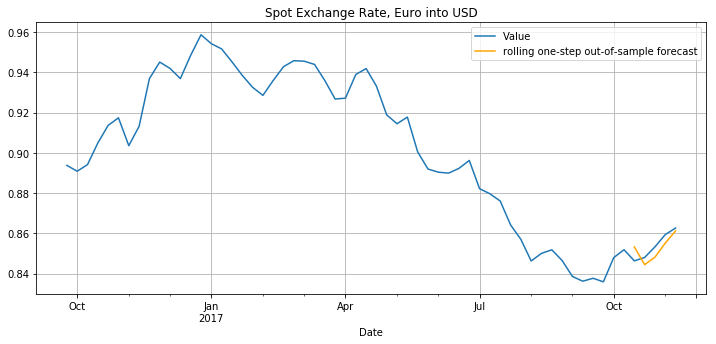

In [0]:
ts_week[-60:].plot(figsize=(12, 5), grid=True, label= 'observed')
predictions_series.plot(c='orange', figsize=(12, 5), grid=True, label='rolling one-step out-of-sample forecast')
plt.title('Spot Exchange Rate, Euro into USD')
plt.legend()
plt.show()

__Topics you can Explore further:__
* Arimax models
* Seasonal models of ARIMA

![](https://media.giphy.com/media/xT0xezQGU5xCDJuCPe/giphy.gif )


---



